Assignment2 
- Gather Twitter data regarding a topic of your own interest and perform the same
exploration as the guide.
- Gather tweets of 5 Twitter users and perform the same exploration as the guide. 

# Twitter Scraping

Twitter is a social media platform that allows users to microblog - to interact with each other and spread messages through short messages. Twitter is one of the most widely used social media platforms in the world, and users are often posting unfiltered opinions that are able to be retrieved easily. 

### Installing Twitter package

We have to first install the Twitter package to use the Twitter API. 

In [64]:
!pip install twitter

In [65]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import twitter
import json

## Initialising Twitter API

To use Twitter API, we have to initialise it using the tokens and the authentication keys that has been provided. 

In [66]:
# Copy and paste the keys and tokens that you have acquired
CONSUMER_KEY = 'GhFP9qESvm9Yn1a33PdGQqhqy'
CONSUMER_SECRET = 'ajBcDrRy5H41AOY34GNBerk6T4UnpcgWvI6onhYjoo7WL0WLUU'
OAUTH_TOKEN = '900198409-Ed8gdvXEIHswVBYte9hsVn3AzX2NuqEvGdeIsrlA'
OAUTH_TOKEN_SECRET = '0zyz01cn7n9LUdNyoLodsAeZuEA7SsqKjCqxozn2z4oxh'

Twitter utilises OAuth, which acts as a key that grants the users access to private resources on a website (in this case, Twitter). Twitter API integrates with OAuth to create an authentication code that allows you to access the Twitter data. 

In the code below, we input the authentication codes into the OAuth function and pass that authentication key to the Twitter API through twitter.Twitter function. This is the initialisation step for Twitter API, which creates an object that contains the authenticated API.

In [67]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

## Querying Tweets



What if we wanted to see the tweets that contained the keyword: "Data science"?  

In [68]:
searched = twitter_api.search.tweets(q='Data science', count=100)

In [69]:
print(searched)

{'statuses': [{'created_at': 'Thu Oct 13 13:18:00 +0000 2022', 'id': 1580548408091082752, 'id_str': '1580548408091082752', 'text': "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Sumanth_077', 'name': 'Sumanth', 'id': 1420290522728394757, 'id_str': '1420290522728394757', 'indices': [3, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1643436534, 'id_str': '1643436534', 'name': 'The Analyst', 'screen_name': 'khan8889', 'location': 'الامارات العربية المتحدة', 'description': '', 'url': None

The result for the query returns a dictionary containing 2 keys:

In [70]:
len(searched)

2

In [71]:
for key, value in searched.items():
    print(key)

statuses
search_metadata


The 2 keys are "statuses" and "search_metadata". Statuses contain the actual tweets collected and the corresponding metadata. Search_metadata contains the information about the query itself, which is not that useful at the moment. We will mainly focus on the "statuses" key. 

We have to be aware of the data structure when navigating through the collected tweets. 

In [72]:
print(searched['statuses'][0]['text'])

RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.

Learn with these courses from G…


In [73]:
searched['search_metadata']

{'completed_in': 0.219,
 'max_id': 1580548408091082752,
 'max_id_str': '1580548408091082752',
 'next_results': '?max_id=1580546255050006529&q=Data%20science&count=100&include_entities=1',
 'query': 'Data+science',
 'refresh_url': '?since_id=1580548408091082752&q=Data%20science&include_entities=1',
 'count': 100,
 'since_id': 0,
 'since_id_str': '0'}

In [74]:
len(searched['statuses'])

100

It seems that we have gathered 100 tweets. We have set the limit to 100 tweets, and 100 tweets were available at the time. 

In the key, "statuses" refers to the actual tweets and the corresponding metadata. For example, in each status, "text" section contains the actual tweet, "id" section contains the id number for that tweet, "entities" contains the entities for the particular tweet, such as hashtags. 

Now, let's try to extract 10 tweets among the tweets that we have gathered. Along with the actual tweets, let's try to also extract the **number of favourites**, and the **number of retweets**. 

Number of favourites refers to the number of times the tweet was favourited by another use. This is a feature of Twitter that allows users to "like" the tweet. 

Retweets refers to a user relaying the tweet to their Twitter profile, allowing their followers to see the particular tweet. 

We will first store all statuses in the "statuses" variable for easier iteration.

In [75]:
statuses = searched['statuses']

In [76]:
len(statuses)

100

In [77]:
print(statuses)

[{'created_at': 'Thu Oct 13 13:18:00 +0000 2022', 'id': 1580548408091082752, 'id_str': '1580548408091082752', 'text': "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Sumanth_077', 'name': 'Sumanth', 'id': 1420290522728394757, 'id_str': '1420290522728394757', 'indices': [3, 15]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1643436534, 'id_str': '1643436534', 'name': 'The Analyst', 'screen_name': 'khan8889', 'location': 'الامارات العربية المتحدة', 'description': '', 'url': None, 'entities':

Then, now, we will iterate through first 10 of these tweets gathered, and print the tweet, the number of favourites, and the number of retweets. 

In [78]:
for i in range(10):
    print()
    print(statuses[i]['text'])
    print('Favourites: ', statuses[i]['favorite_count'])
    print('Retweets: ', statuses[i]['retweet_count'])


RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.

Learn with these courses from G…
Favourites:  0
Retweets:  2140

RT @_Promise_Nonso: Scholarship Alert ‼️‼️
....For Data Analysis, Data Science, ML newbies and practitioners ⏩

If you have been wanting to…
Favourites:  0
Retweets:  648

RT @TelixPharma: At #EANM22, our VP Clinical Science, Neel Patel, will be presenting a top rated oral presentation on the Phase II ProstACT…
Favourites:  0
Retweets:  1

RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.

Learn with these courses from G…
Favourites:  0
Retweets:  2140

RT @Sauain: Learn Data Science for FREE 🧵
Favourites:  0
Retweets:  51

RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.

Learn with these courses from G…
Favourites:  0
Retweets:  2140

RT @TRJ_0751: That's it

I hope you found it helpful. 

Follow @TR

We can see from the above code that we can separate and extract the tweets and their corresponding metadata. So if necessary, we can store each of them as a separate variable and make them into features for later use. 

From the texts we have gathered, let's now try to extract the tweet, the user name of the one who tweeted, and the hashtags involved in the tweet.

In [79]:
status_texts = [status['text'] for status in statuses]

screen_names = [user_mention['screen_name']
               for status in statuses
                   for user_mention in status['entities']['user_mentions']]

hashtags = [hashtag['text'] for status in statuses
               for hashtag in status['entities']['hashtags']]

In [80]:
print(status_texts)

["RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…", 'RT @_Promise_Nonso: Scholarship Alert ‼️‼️\n....For Data Analysis, Data Science, ML newbies and practitioners ⏩\n\nIf you have been wanting to…', 'RT @TelixPharma: At #EANM22, our VP Clinical Science, Neel Patel, will be presenting a top rated oral presentation on the Phase II ProstACT…', "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…", 'RT @Sauain: Learn Data Science for FREE 🧵', "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…", "RT @TRJ_0751: That's it\n\nI hope you found it helpful. \n\nFollow @TRJ_0751 for more amazing content on Data Science, Machine learning, Deep L…", "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data 

In [81]:
print(screen_names)

['Sumanth_077', '_Promise_Nonso', 'TelixPharma', 'Sumanth_077', 'Sauain', 'Sumanth_077', 'TRJ_0751', 'TRJ_0751', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'melanieganzben1', 'Santhoscheeku77', 'datawithsuman', 'Sumanth_077', '_Promise_Nonso', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Covid19Critical', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'datawithsuman', 'Sumanth_077', 'TRJ_0751', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Covid19Critical', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'saylor', 'saylordotorg', 'Santhoscheeku77', 'Sumanth_077', 'Sumanth_077', 'datawithsuman', 'datawithsuman', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 'CFCCentral3', 'Auro15Das', 'Sumanth_077', 'Sumanth_077', 'BoekeSimon', 'Radiology_AI', 'Sumanth_077', 'katharine_mach', 'Sumanth_077', 'Covid19Critical', 'SangameshTatti', 'mchellap', 'ruchirsharma_1', 'Sumanth_077', 'Sumanth_077', 'Sumanth_077', 

In [82]:
print(hashtags)

['EANM22', 'FLCCC', 'PowerBI', 'FLCCC', 'wirstellenein', 'SQL', 'statistics', 'DB', 'DataScience', 'MachineLearning', 'bigdata', 'pcsm', 'AI', 'FLCCC', 'Science', 'Podcast', 'nicotine']


Let's now see how many tweets we have gathered. 

In [83]:
len(status_texts)

100

Now, we have gathered the tweets containing the terms "Data science", and we have extracted the tweets, their user names, and their hashtags. For the next section, to make the computations easier, we will focus only on the first 10 tweets gathered. 

In [84]:
status_10 = status_texts[:10]
len(status_10)

10

In [85]:
status_10

["RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…",
 'RT @_Promise_Nonso: Scholarship Alert ‼️‼️\n....For Data Analysis, Data Science, ML newbies and practitioners ⏩\n\nIf you have been wanting to…',
 'RT @TelixPharma: At #EANM22, our VP Clinical Science, Neel Patel, will be presenting a top rated oral presentation on the Phase II ProstACT…',
 "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…",
 'RT @Sauain: Learn Data Science for FREE 🧵',
 "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python, Data Science, and Machine Learning.\n\nLearn with these courses from G…",
 "RT @TRJ_0751: That's it\n\nI hope you found it helpful. \n\nFollow @TRJ_0751 for more amazing content on Data Science, Machine learning, Deep L…",
 "RT @Sumanth_077: Don't pay ridiculous amount of money to study Python

## Text Vectorisation

Since we have now gathered the tweets according to some query that we want, we can now perform text vectorisation methods to quantify the texts. The words in the text will be encoded as integers or floating point values for use as input. By quantifying the texts, we can make them into usable features for further analysis, such as machine learning usage. 

We will take a look at 2 common methods of vectorisation: Count Vectorisation and TF-IDF Vectorisation. 

### Count Vectorisation

Count vectorising refers to a method of tokenising a collection of text documents and building a vocabulary of known words while encoding new documents using that vocabulary built. 

The method of creation is as follows: 

1. Create an instance of the CountVectorizer class
2. Call the fit() function in order to learn a vocabulary from one or more documents
3. Call the transform() function on one or more documents as needed to encode each as a vector

An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document. 

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(status_10)

print(vectorizer.get_feature_names())

['_promise_nonso', 'alert', 'amazing', 'amount', 'analysis', 'and', 'at', 'be', 'been', 'clinical', 'content', 'courses', 'data', 'deep', 'don', 'eanm22', 'follow', 'for', 'found', 'free', 'from', 'have', 'helpful', 'hope', 'if', 'ii', 'it', 'learn', 'learning', 'machine', 'ml', 'money', 'more', 'neel', 'newbies', 'of', 'on', 'oral', 'our', 'patel', 'pay', 'phase', 'practitioners', 'presentation', 'presenting', 'prostact', 'python', 'rated', 'ridiculous', 'rt', 'sauain', 'scholarship', 'science', 'study', 'sumanth_077', 'telixpharma', 'that', 'the', 'these', 'to', 'top', 'trj_0751', 'vp', 'wanting', 'will', 'with', 'you']


The result shows the representing words that are included in all the tweets. We can transform this into an array to make this into numerical data. The numerical data simply shows how many times a certain word has appeared in each text (tweet). 

In [87]:
print(x.toarray())

[[0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1
  0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 1 1 0 0 1 0 0 0 2 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
  1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1
  0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1
  0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 2 0 1 1 0 0 1 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 1]
 [0 0 0 1 0 1 0 0 0 0 0 1 1

0 refers to the word not being present in the text, and 1 refers to the word being present in the text. This data can now be used as a feature to be used as an input for machine learning or other analytical purposes. 

### TF-IDF Vectorizer

Using CountVectorizer is very simple but may be too simple for usage. For example, some words like "the" might appear many times and their counts may not be meaningful in the encoded vectors. Therefore, the more popular method of calculating word frequencies is TF-IDF (Term Frequency-Inverse Document Frequency) 

* Term frequency: summarises how often a given word appears within a document
* Inverse document frequency: downscales words that appear a lot across documents

Basically, TF-IDF are word frequency scores that try to highlight words that are more interesting. 

TfidfVectorizer will tokenise documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. The flow of usage is basically the same as CountVectorizer. 

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()

# tokenise and build vocab
vectorizer.fit(status_10)

TfidfVectorizer()

We can print out the learnt vocabulary as such:

In [90]:
print(vectorizer.vocabulary_)

{'rt': 49, 'sumanth_077': 54, 'don': 14, 'pay': 40, 'ridiculous': 48, 'amount': 3, 'of': 35, 'money': 31, 'to': 59, 'study': 53, 'python': 46, 'data': 12, 'science': 52, 'and': 5, 'machine': 29, 'learning': 28, 'learn': 27, 'with': 65, 'these': 58, 'courses': 11, 'from': 20, '_promise_nonso': 0, 'scholarship': 51, 'alert': 1, 'for': 17, 'analysis': 4, 'ml': 30, 'newbies': 34, 'practitioners': 42, 'if': 24, 'you': 66, 'have': 21, 'been': 8, 'wanting': 63, 'telixpharma': 55, 'at': 6, 'eanm22': 15, 'our': 38, 'vp': 62, 'clinical': 9, 'neel': 33, 'patel': 39, 'will': 64, 'be': 7, 'presenting': 44, 'top': 60, 'rated': 47, 'oral': 37, 'presentation': 43, 'on': 36, 'the': 57, 'phase': 41, 'ii': 25, 'prostact': 45, 'sauain': 50, 'free': 19, 'trj_0751': 61, 'that': 56, 'it': 26, 'hope': 23, 'found': 18, 'helpful': 22, 'follow': 16, 'more': 32, 'amazing': 2, 'content': 10, 'deep': 13}


The vocabulary simply shows the unique integer index for each word in the document. 

In [91]:
print(vectorizer.idf_)

[2.70474809 2.70474809 2.70474809 1.45198512 2.70474809 1.31845373
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 1.45198512
 1.09531018 2.70474809 1.45198512 2.70474809 2.70474809 2.01160091
 2.70474809 2.70474809 1.45198512 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 1.31845373 1.31845373 1.31845373
 2.70474809 1.45198512 2.70474809 2.70474809 2.70474809 1.45198512
 2.29928298 2.70474809 2.70474809 2.70474809 1.45198512 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 1.45198512 2.70474809
 1.45198512 1.         2.70474809 2.70474809 1.         1.45198512
 1.45198512 2.70474809 2.70474809 2.70474809 1.45198512 1.31845373
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 1.45198512
 2.29928298]


The inverse document frequencies are printed above. We can now transform the entire document that we have prepared using TF-IDF method. 

In [92]:
vector = vectorizer.transform([status_10[0]])

In [93]:
print(vector.shape)

(1, 67)


This document is now encoded as a 127-element sparse array. When we convert this to an array: 

In [94]:
print(vector.toarray())

[[0.         0.         0.         0.23161842 0.         0.2103177
  0.         0.         0.         0.         0.         0.23161842
  0.17472219 0.         0.23161842 0.         0.         0.
  0.         0.         0.23161842 0.         0.         0.
  0.         0.         0.         0.2103177  0.2103177  0.2103177
  0.         0.23161842 0.         0.         0.         0.23161842
  0.         0.         0.         0.         0.23161842 0.
  0.         0.         0.         0.         0.23161842 0.
  0.23161842 0.15951845 0.         0.         0.15951845 0.23161842
  0.23161842 0.         0.         0.         0.23161842 0.2103177
  0.         0.         0.         0.         0.         0.23161842
  0.        ]]


We get the TF-IDF score for each word that is normalised to values between 0 and 1. This encoded document vector can now be used directly as features for most of machine learning problems. 

## Word Cloud

We can also visualise the commonly appearing terms in the document. Using the latest 10 tweets that we have prepared, let us create a Word Cloud. 

In [95]:
# combine all strings in the list into one string
status_text = ', '.join(status_10)

In [96]:
!pip install wordcloud

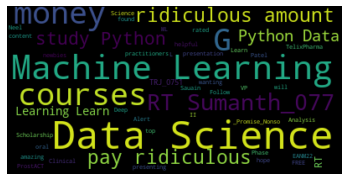

In [97]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wordcloud = WordCloud().generate(status_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

With bigger text document, we can get more interesting word clouds. You can explore more with bigger dataset on your own to gather more interesting insights. 

## Accessing User Information

There is another method of gathering tweets and useful information: accessing user information. 

By accessing user information, we can gain useful information such as:

### Getting User Information

Using **users.lookup(screen_name= )**, we can access a user's information. In the argument "screen_name", we have to input the Twitter ID name that we want to access. The Twitter ID name is the name in the form of "@SocialWebMining", where the @ signifies that it is an ID. The output is a nested dictionary in a list, requiring careful navigation. 

In [100]:
account1 = twitter_api.users.lookup(screen_name='oneruel')
account2 = twitter_api.users.lookup(screen_name='maemuller_')
account3 = twitter_api.users.lookup(screen_name='BTS_twt')
account4 = twitter_api.users.lookup(screen_name='LewisCapaldi')
account5 = twitter_api.users.lookup(screen_name='DUALIPA')

In [101]:
print(account1)
print(account2)
print(account3)
print(account4)
print(account5)

[{'id': 4852672499, 'id_str': '4852672499', 'name': 'RUEL', 'screen_name': 'oneruel', 'location': 'Australia', 'description': 'YOU AGAINST YOURSELF OUT NOW', 'url': 'https://t.co/v6yIhu6yeq', 'entities': {'url': {'urls': [{'url': 'https://t.co/v6yIhu6yeq', 'expanded_url': 'https://linktr.ee/oneruel', 'display_url': 'linktr.ee/oneruel', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 197073, 'friends_count': 65, 'listed_count': 489, 'created_at': 'Wed Jan 27 07:01:55 +0000 2016', 'favourites_count': 840, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 1076, 'lang': None, 'status': {'created_at': 'Mon Oct 10 03:33:30 +0000 2022', 'id': 1579314149229998080, 'id_str': '1579314149229998080', 'text': '@wonderisruel keep looking', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'wonderisruel', 'name': 'roro🍂', 'id': 1106637908323241984, 'id_str': '11066

We can now extract necessary information into variables of our choice. For example, let us extract the **name**, **description**, and **followers_count**. 

In [102]:
account1_name = account1[0]['name']
account1_description = account1[0]['description']
account1_followers = account1[0]['followers_count']

account2_name = account2[0]['name']
account2_description = account2[0]['description']
account2_followers = account2[0]['followers_count']

account3_name = account3[0]['name']
account3_description = account3[0]['description']
account3_followers = account3[0]['followers_count']

account4_name = account4[0]['name']
account4_description = account4[0]['description']
account4_followers = account4[0]['followers_count']

account5_name = account5[0]['name']
account5_description = account5[0]['description']
account5_followers = account5[0]['followers_count']

In [103]:
print(account1_name, account1_description, account1_followers)
print(account2_name, account2_description, account2_followers)
print(account3_name, account3_description, account3_followers)
print(account4_name, account4_description, account4_followers)
print(account5_name, account5_description, account5_followers)

RUEL YOU AGAINST YOURSELF OUT NOW 197073
Mae Muller 💃🏻 https://t.co/dICxiAntsS 30484
방탄소년단 Hi ! We are BTS ! 47596185
Lewis Capaldi My brand new single ‘Forget Me’ is out now! X ⬇️ 1392221
DUA LIPA FUTURE NOSTALGIA 10053203


### Getting User's Tweets

Getting a user's information is good, but it would be much better to get the tweets of a user. Fortunately, the Twitter API provides such function: **statuses.user_timeline(screen_name= , count= )**

In [104]:
user1_tweets = twitter_api.statuses.user_timeline(screen_name='@oneruel', count=100)
user2_tweets = twitter_api.statuses.user_timeline(screen_name='@maemuller_', count=100)
user3_tweets = twitter_api.statuses.user_timeline(screen_name='@BTS_twt', count=100)
user4_tweets = twitter_api.statuses.user_timeline(screen_name='@LewisCapaldi', count=100)
user5_tweets = twitter_api.statuses.user_timeline(screen_name='@DUALIPA', count=100)

In [105]:
print(user1_tweets)
print(user2_tweets)
print(user3_tweets)
print(user4_tweets)
print(user5_tweets)

[{'created_at': 'Mon Oct 10 03:33:30 +0000 2022', 'id': 1579314149229998080, 'id_str': '1579314149229998080', 'text': '@wonderisruel keep looking', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'wonderisruel', 'name': 'roro🍂', 'id': 1106637908323241984, 'id_str': '1106637908323241984', 'indices': [0, 13]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': 1579295115201634304, 'in_reply_to_status_id_str': '1579295115201634304', 'in_reply_to_user_id': 1106637908323241984, 'in_reply_to_user_id_str': '1106637908323241984', 'in_reply_to_screen_name': 'wonderisruel', 'user': {'id': 4852672499, 'id_str': '4852672499', 'name': 'RUEL', 'screen_name': 'oneruel', 'location': 'Australia', 'description': 'YOU AGAINST YOURSELF OUT NOW', 'url': 'https://t.co/v6yIhu6yeq', 'entities': {'url': {'urls': [{'url': 'https://t.co/v6yIhu6yeq', 'expanded_url': 'https://linktr

In [106]:
len(user1_tweets), len(user2_tweets), len(user3_tweets), len(user4_tweets), len(user5_tweets)

(100, 99, 99, 100, 100)

We will first try to navigate through the data structure and print out the latest 10 tweets. 

In [108]:
print("user1\n\n") 
for i in range(10):
    print()
    print(user1_tweets[i]['text'])

print("\n\nuser2\n\n")    
for i in range(10):
    print()
    print(user2_tweets[i]['text'])
print("\n\nuser3\n\n")  
for i in range(10):
    print()
    print(user3_tweets[i]['text'])
print("\n\nuser4\n\n")  
for i in range(10):
    print()
    print(user4_tweets[i]['text'])
print("\n\nuser5\n\n")  
for i in range(10):
    print()
    print(user5_tweets[i]['text'])

user1



@wonderisruel keep looking

surprise! i’m going to be popping up with my band and @adidas to do some free live shows at secret locations this w… https://t.co/gT3FahoWn9

back with another!! u can pre-save this bad boy now and get a cheeky vid of me playing it acoustic on a ny rooftop.… https://t.co/GrPK7OOhz8

cover of behind the blinds, issue coming out in october https://t.co/3CzEPZrU0t

RT @nova969: The one and only @oneruel
will be taking the #NovasRedRoom stage from a private and exclusive location in Sydney and we want y…

MILAN i’m gonna be at Dedicatvm S.Carolo Mdcccxlvii from 6pm tonight to film a lil acoustic vid of a new track, com… https://t.co/xnw0Rsmd4D

ciao MILAN! i’m here and i wanna record a little acoustic vid somewhere in town around 6pm.. any suggestions of where to go?

RT @parisianarchive: everyone reply with your vids of THAT part in you against yourself i’ll start 

@oneruel https://t.co/Hl9tfxxTgH

@lostboylawley @rosesunsaid SEE YOU TONIGHT!!

@NlKOL

Now, we will save all of Elon Musk's tweets into a variable since we know now how to navigate through the data structure. 

In [109]:
user1_texts = [status['text'] for status in user1_tweets]
user2_texts = [status['text'] for status in user2_tweets]
user3_texts = [status['text'] for status in user3_tweets]
user4_texts = [status['text'] for status in user4_tweets]
user5_texts = [status['text'] for status in user5_tweets]


In [110]:
len(user1_texts), len(user2_texts), len(user3_texts), len(user4_texts), len(user5_texts)

(100, 99, 99, 100, 100)

In [111]:
print(user1_texts)

['@wonderisruel keep looking', 'surprise! i’m going to be popping up with my band and @adidas to do some free live shows at secret locations this w… https://t.co/gT3FahoWn9', 'back with another!! u can pre-save this bad boy now and get a cheeky vid of me playing it acoustic on a ny rooftop.… https://t.co/GrPK7OOhz8', 'cover of behind the blinds, issue coming out in october https://t.co/3CzEPZrU0t', 'RT @nova969: The one and only @oneruel\nwill be taking the #NovasRedRoom stage from a private and exclusive location in Sydney and we want y…', 'MILAN i’m gonna be at Dedicatvm S.Carolo Mdcccxlvii from 6pm tonight to film a lil acoustic vid of a new track, com… https://t.co/xnw0Rsmd4D', 'ciao MILAN! i’m here and i wanna record a little acoustic vid somewhere in town around 6pm.. any suggestions of where to go?', 'RT @parisianarchive: everyone reply with your vids of THAT part in you against yourself i’ll start \n\n@oneruel https://t.co/Hl9tfxxTgH', '@lostboylawley @rosesunsaid SEE YOU TONIG

We will use only 10 tweets, same as before, for computational ease. 

In [112]:
user1_10 = user1_texts[:10]
user2_10 = user2_texts[:10]
user3_10 = user3_texts[:10]
user4_10 = user4_texts[:10]
user5_10 = user5_texts[:10]
len(user1_10), len(user2_10), len(user3_10), len(user4_10), len(user5_10)

(10, 10, 10, 10, 10)

In [113]:
user1_10

['@wonderisruel keep looking',
 'surprise! i’m going to be popping up with my band and @adidas to do some free live shows at secret locations this w… https://t.co/gT3FahoWn9',
 'back with another!! u can pre-save this bad boy now and get a cheeky vid of me playing it acoustic on a ny rooftop.… https://t.co/GrPK7OOhz8',
 'cover of behind the blinds, issue coming out in october https://t.co/3CzEPZrU0t',
 'RT @nova969: The one and only @oneruel\nwill be taking the #NovasRedRoom stage from a private and exclusive location in Sydney and we want y…',
 'MILAN i’m gonna be at Dedicatvm S.Carolo Mdcccxlvii from 6pm tonight to film a lil acoustic vid of a new track, com… https://t.co/xnw0Rsmd4D',
 'ciao MILAN! i’m here and i wanna record a little acoustic vid somewhere in town around 6pm.. any suggestions of where to go?',
 'RT @parisianarchive: everyone reply with your vids of THAT part in you against yourself i’ll start \n\n@oneruel https://t.co/Hl9tfxxTgH',
 '@lostboylawley @rosesunsaid SEE Y

### Vectoriser with User Tweets

Same as before, we can try vectorising Elon Musk's tweets using Count Vectoriser, TF-IDF Vectoriser, and visualising through Word Cloud. 

#### Count Vectoriser

In [115]:
vectorizer1 = CountVectorizer()
x1 = vectorizer1.fit_transform(user1_10)
print(vectorizer1.get_feature_names())

vectorizer2 = CountVectorizer()
x2 = vectorizer2.fit_transform(user2_10)
print(vectorizer2.get_feature_names())

vectorizer3 = CountVectorizer()
x3 = vectorizer3.fit_transform(user3_10)
print(vectorizer3.get_feature_names())

vectorizer4 = CountVectorizer()
x4 = vectorizer4.fit_transform(user4_10)
print(vectorizer4.get_feature_names())

vectorizer5 = CountVectorizer()
x5 = vectorizer5.fit_transform(user5_10)
print(vectorizer5.get_feature_names())

['3czepzru0t', '6pm', 'acoustic', 'adidas', 'against', 'and', 'another', 'any', 'around', 'at', 'back', 'bad', 'band', 'be', 'behind', 'blinds', 'boy', 'can', 'carolo', 'cheeky', 'ciao', 'co', 'com', 'coming', 'cover', 'dedicatvm', 'do', 'everyone', 'exclusive', 'film', 'free', 'from', 'get', 'go', 'going', 'gonna', 'grpk7oohz8', 'gt3fahown9', 'here', 'hl9tfxxtgh', 'https', 'in', 'issue', 'it', 'just', 'keep', 'lil', 'little', 'live', 'll', 'location', 'locations', 'looking', 'lostboylawley', 'mdcccxlvii', 'me', 'milan', 'my', 'new', 'nlkolaii', 'nova969', 'novasredroom', 'now', 'ny', 'october', 'of', 'on', 'one', 'oneruel', 'only', 'out', 'parisianarchive', 'part', 'playing', 'popping', 'pre', 'private', 'record', 'reply', 'rooftop', 'rosesunsaid', 'rt', 'save', 'secret', 'see', 'shows', 'some', 'somewhere', 'stage', 'start', 'suggestions', 'surprise', 'sydney', 'taking', 'that', 'the', 'this', 'to', 'tonight', 'town', 'track', 'up', 'vid', 'vids', 'wanna', 'want', 'we', 'where', 'wil

In [116]:
print(x1.toarray());print(x2.toarray());print(x3.toarray());print(x4.toarray());print(x5.toarray());

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0
  1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 0 1 1 0 0 0 0 

#### TF-IDF Vectoriser

In [117]:
vectorizer1 = TfidfVectorizer()
vectorizer1.fit(user1_10)

vectorizer2 = TfidfVectorizer()
vectorizer2.fit(user2_10)

vectorizer3 = TfidfVectorizer()
vectorizer3.fit(user3_10)


vectorizer4 = TfidfVectorizer()
vectorizer4.fit(user4_10)


vectorizer5 = TfidfVectorizer()
vectorizer5.fit(user5_10)

print(vectorizer1.vocabulary_)
print(vectorizer2.vocabulary_)
print(vectorizer3.vocabulary_)
print(vectorizer4.vocabulary_)
print(vectorizer5.vocabulary_)

{'wonderisruel': 110, 'keep': 45, 'looking': 52, 'surprise': 91, 'going': 34, 'to': 97, 'be': 13, 'popping': 74, 'up': 101, 'with': 109, 'my': 57, 'band': 12, 'and': 5, 'adidas': 3, 'do': 26, 'some': 86, 'free': 30, 'live': 48, 'shows': 85, 'at': 9, 'secret': 83, 'locations': 51, 'this': 96, 'https': 40, 'co': 21, 'gt3fahown9': 37, 'back': 10, 'another': 6, 'can': 17, 'pre': 75, 'save': 82, 'bad': 11, 'boy': 16, 'now': 62, 'get': 32, 'cheeky': 19, 'vid': 102, 'of': 65, 'me': 55, 'playing': 73, 'it': 43, 'acoustic': 2, 'on': 66, 'ny': 63, 'rooftop': 79, 'grpk7oohz8': 36, 'cover': 24, 'behind': 14, 'the': 95, 'blinds': 15, 'issue': 42, 'coming': 23, 'out': 70, 'in': 41, 'october': 64, '3czepzru0t': 0, 'rt': 81, 'nova969': 60, 'one': 67, 'only': 69, 'oneruel': 68, 'will': 108, 'taking': 93, 'novasredroom': 61, 'stage': 88, 'from': 31, 'private': 76, 'exclusive': 28, 'location': 50, 'sydney': 92, 'we': 106, 'want': 105, 'milan': 56, 'gonna': 35, 'dedicatvm': 25, 'carolo': 18, 'mdcccxlvii':

In [118]:
print(vectorizer1.idf_)
print(vectorizer2.idf_)
print(vectorizer3.idf_)
print(vectorizer4.idf_)
print(vectorizer5.idf_)


[2.70474809 2.29928298 2.01160091 2.70474809 2.70474809 1.78845736
 2.70474809 2.70474809 2.70474809 2.29928298 2.70474809 2.70474809
 2.70474809 2.01160091 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 1.6061358  2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.29928298 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 1.6061358  1.78845736
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.29928298 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.29928298 2.70474809 1.6061358
 2.70474809 2.70474809 2.29928298 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.29928298 2.70474809 2.70474809
 2.70474809 2.70474809 2.70474809 2.70474809 2.70474809 2.70474

In [119]:
vector1 = vectorizer1.transform([user1_10[0]])
vector2 = vectorizer2.transform([user2_10[0]])
vector3 = vectorizer3.transform([user3_10[0]])
vector4 = vectorizer4.transform([user4_10[0]])
vector5 = vectorizer5.transform([user5_10[0]])

In [120]:
print(vector1.shape, vector2.shape, vector3.shape, vector4.shape, vector5.shape )

(1, 115) (1, 69) (1, 86) (1, 117) (1, 124)


In [121]:
print(vector1.toarray())
print(vector2.toarray())
print(vector3.toarray())
print(vector4.toarray())
print(vector5.toarray())


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.57735027 0.         0.
  0.         0.         0.         0.         0.57735027 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

#### Word Cloud

In [122]:
user1_combined = ', '.join(user1_10)
user2_combined = ', '.join(user2_10)
user3_combined = ', '.join(user3_10)
user4_combined = ', '.join(user4_10)
user5_combined = ', '.join(user5_10)

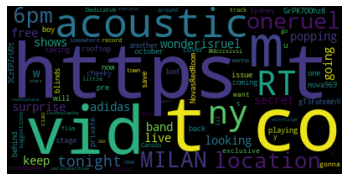

In [123]:
wordcloud1 = WordCloud().generate(user1_combined)

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

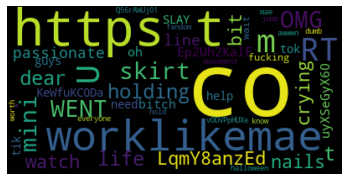

In [124]:
wordcloud2 = WordCloud().generate(user2_combined)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

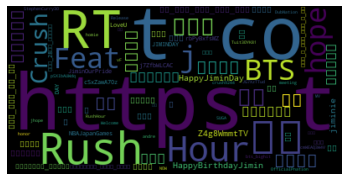

In [125]:
wordcloud3 = WordCloud().generate(user3_combined)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
plt.show()

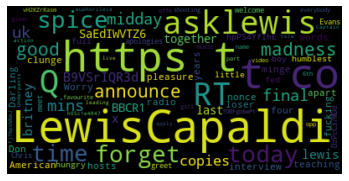

In [126]:
wordcloud4 = WordCloud().generate(user4_combined)

plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
plt.show()

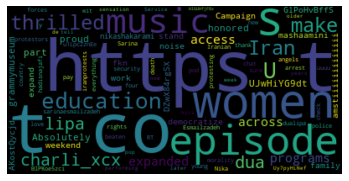

In [127]:
wordcloud5 = WordCloud().generate(user5_combined)

plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
plt.show()

## Conclusion

Therefore, now we have taken a look at some simplistic methods in exploring Twitter and gathering tweets. There are many more complex and advanced methods that can be used that requires more programming and API understanding and expertise. 